In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from scipy.stats import rankdata


In [2]:
df = pd.read_csv('jobfair_train.csv',dtype={'dynamic_payment_segment':'category',
                                            'registration_country':'category',
                                            'registration_platform_specific':'category',
                                            })
df_test = pd.read_csv('jobfair_test.csv',dtype={'dynamic_payment_segment':'category',
                                            'registration_country':'category',
                                            'registration_platform_specific':'category',
                                            })
df.describe()


,season,club_id,league_id,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,playtime_last_28_days,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
count,55314.0,5.531400e+04,5.531400e+04,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,5.531400e+04,55314.000000,55314.000000,37763.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000
mean,173.0,1.210977e+07,2.909804e+06,23.409372,23.718661,4.533516,4.344776,0.584372,12.357089,3.623170,63.432169,2.955178e+07,12.411813,61.107694,3.901014,121.393897,113.133077,283.083523,307.085964,7.500000
std,0.0,3.384016e+06,2.102140e+03,42.009274,2.206240,1.204753,1.177068,0.178090,11.849102,5.906055,101.831670,5.233892e+07,6.403013,188.288285,2.625576,842.775529,3183.550398,789.250959,823.362486,4.031165
min,173.0,2.750000e+02,2.904743e+06,1.000000,18.000000,1.451697,1.354905,-1.287736,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,-4975.000000,-169.000000,0.000000,1.000000
25%,173.0,1.151105e+07,2.907961e+06,2.000000,22.000000,3.691136,3.500062,0.479571,1.000000,0.000000,1.000000,7.364150e+04,8.000000,0.000000,1.000000,0.000000,11.000000,41.000000,52.000000,4.000000
50%,173.0,1.392822e+07,2.910038e+06,4.000000,23.000000,4.481376,4.311590,0.561158,7.000000,0.000000,16.000000,6.230431e+06,12.000000,11.000000,3.000000,38.000000,29.000000,88.000000,118.000000,7.500000
75%,173.0,1.424454e+07,2.911697e+06,17.000000,25.000000,5.217394,5.021726,0.648180,27.000000,5.000000,89.000000,3.768711e+07,17.000000,63.000000,6.000000,107.000000,73.000000,243.000000,281.000000,11.000000
max,173.0,1.451477e+07,2.912940e+06,172.000000,33.000000,23.716073,20.434876,5.164494,28.000000,26.000000,1365.000000,1.340479e+09,26.000000,7443.000000,11.000000,120233.000000,744202.000000,32767.000000,32767.000000,14.000000


In [3]:
df.isnull().sum(axis = 0)

season                                         0
club_id                                        0
league_id                                      0
dynamic_payment_segment                        0
cohort_season                                  0
avg_age_top_11_players                         0
avg_stars_top_11_players                       0
avg_stars_top_14_players                       0
avg_training_factor_top_11_players             0
days_active_last_28_days                       0
league_match_watched_count_last_28_days        0
session_count_last_28_days                     0
playtime_last_28_days                          0
registration_country                           0
registration_platform_specific                 0
league_match_won_count_last_28_days            0
training_count_last_28_days                    0
global_competition_level                   17551
tokens_spent_last_28_days                      0
tokens_stash                                   0
rests_stash         

In [4]:
df['global_competition_level'] = df['global_competition_level'].fillna(value=0)

<Axes: xlabel='dynamic_payment_segment', ylabel='count'>

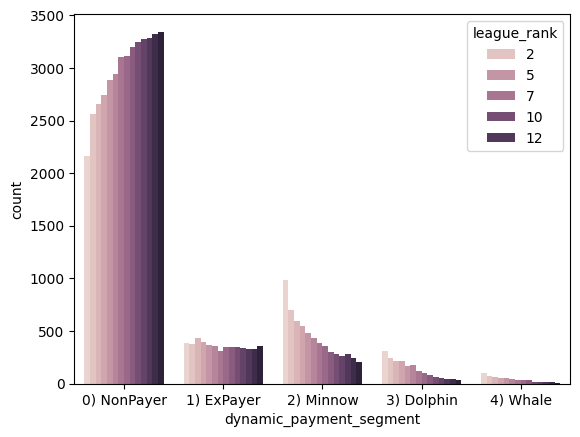

In [5]:
sns.countplot(df,x='dynamic_payment_segment',hue='league_rank')

C:\Users\Aleksa Kostic\AppData\Local\Temp\ipykernel_11396\3725084713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['registration_country'] = df_subset['registration_country'].cat.remove_unused_categories()


<Axes: xlabel='registration_country', ylabel='count'>

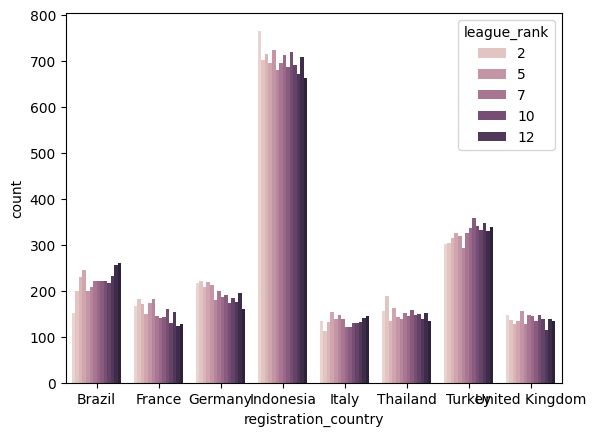

In [6]:
df_count = df['registration_country'].value_counts()/len(df)
df_subset = df[df["registration_country"].isin(df_count[df_count>0.03].index)]
df_subset['registration_country'] = df_subset['registration_country'].cat.remove_unused_categories()
sns.countplot(df_subset,x='registration_country',hue='league_rank')


C:\Users\Aleksa Kostic\AppData\Local\Temp\ipykernel_11396\3571421502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['registration_platform_specific'] = df_subset['registration_platform_specific'].cat.remove_unused_categories()


<Axes: xlabel='registration_platform_specific', ylabel='count'>

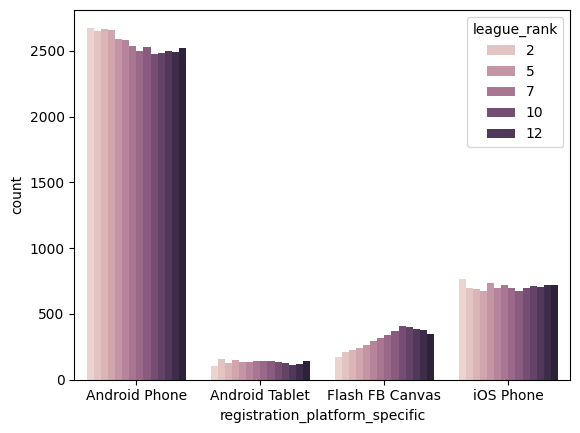

In [7]:
df_count = df['registration_platform_specific'].value_counts()/len(df)
df_subset = df[df["registration_platform_specific"].isin(df_count[df_count>0.03].index)]
df_subset['registration_platform_specific'] = df_subset['registration_platform_specific'].cat.remove_unused_categories()
sns.countplot(df_subset,x='registration_platform_specific', hue='league_rank')

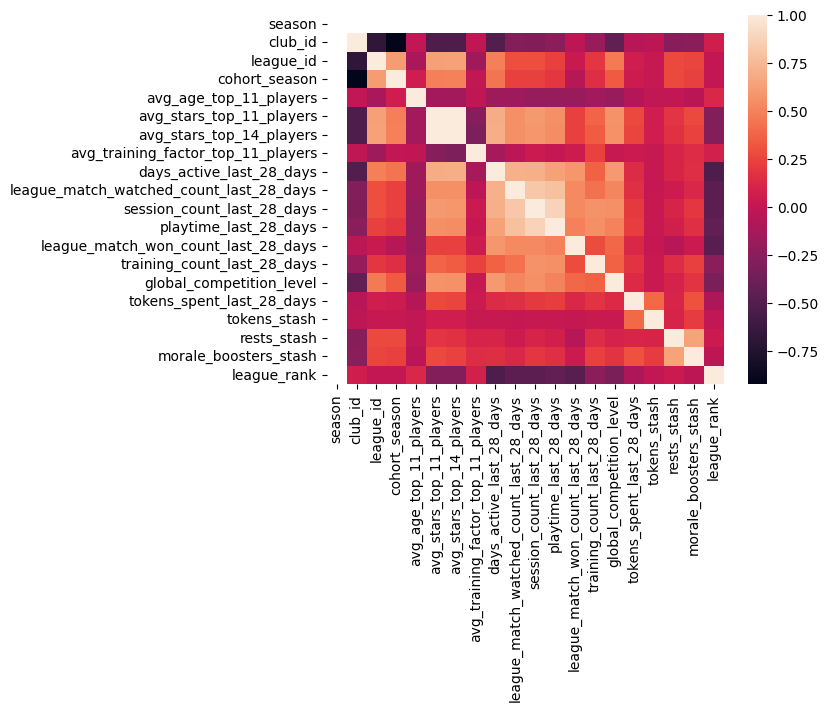

In [8]:
sns.heatmap(df.select_dtypes(include='number').corr());


In [9]:
def preprocess(df):
    df = df.copy(deep=True)
    df['global_competition_level'] = df['global_competition_level'].fillna(value=0)
    df = df.drop('avg_stars_top_14_players', axis=1)
    df = df.drop('season', axis=1)
    df = df.sort_values('league_id')
    return df

def extract_data(df):
    X = df.loc[:, ~df.columns.isin(['club_id', 'league_id','league_rank'])]
    y = df['league_rank']
    group_id = df['league_id']
    return X,y,group_id

In [10]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(test_size=.3, n_splits=1, random_state = 4).split(df, groups=df['league_id'])

X_train_inds, X_test_inds = next(gss)

train_data = df.iloc[X_train_inds]
X_train, y_train, group_id = extract_data(preprocess(train_data))

test_data = df.iloc[X_test_inds]
X_test, y_test, group_id_test = extract_data(preprocess(test_data))

In [11]:
import xgboost as xgb
CLUBS_PER_LEAGUE = 14

def eval_model(model, X_test, y_test):
    pred = predict(model, X_test)
    return mean_absolute_error((y_test.to_numpy()), pred)

def predict(model, X_test):
    return rankdata(model.predict(X_test).reshape(-1, CLUBS_PER_LEAGUE), axis=1).ravel().astype(np.int32)

model = xgb.XGBRanker(  
    booster='gbtree',
    objective='rank:pairwise',
    random_state=0, 
    colsample_bytree=0.9, 
    reg_lambda=0.67,
    min_child_weight=4,
    max_depth=3, 
    n_estimators=120, 
    subsample=1,
    lambdarank_pair_method = 'mean',
    lambdarank_num_pair_per_sample=13,
    enable_categorical=True,
    )

model.fit(X_train, y_train, qid=group_id, verbose=True)

eval_model(model, X_test, y_test)

1.9884967477716213

In [12]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 2, 6, 1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
    }

def objective(space):
    clf=xgb.XGBRanker(booster='gbtree',
                    objective='rank:pairwise',
                    lambdarank_pair_method = 'mean',
                    lambdarank_num_pair_per_sample=13,
                    enable_categorical=True,
                    n_estimators = 120,
                    random_state=0, 
                    max_depth = int(space['max_depth']), 
                    min_child_weight=int(space['min_child_weight']),
                    reg_lambda=space['reg_lambda']
                    )
    
    
    clf.fit(X_train, y_train, qid=group_id,verbose=False)
    
    mae = eval_model(clf, X_test, y_test) 
    return {'loss': mae, 'status': STATUS_OK }

In [14]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
best_hyperparams

  5%|▌         | 5/100 [00:12<03:50,  2.43s/trial, best loss: 1.9882558419657914]

In [ ]:
from catboost import CatBoostRanker, Pool
model = CatBoostRanker(
                        loss_function='QueryRMSE',
                        iterations=200,
                        depth=4,
                        learning_rate=0.4,
                       )
mapping = dict(zip(np.unique(group_id),np.arange(len(group_id))))
group_id_catboost = group_id.apply(lambda x: mapping[x]).values
data = Pool(X_train,y_train,group_id=group_id_catboost,
            cat_features = ['registration_country', 'dynamic_payment_segment', 'registration_platform_specific'],
            )
model.fit(data, verbose=False)
eval_model(model, X_test, y_test)


1.9320645627559625

In [ ]:
space={ 'depth': hp.quniform("depth", 4, 8, 1),
        'l2_leaf_reg' : hp.uniform('l2_leaf_reg', 0,20),
        'learning_rate': hp.loguniform("learning_rate",-4,0),
    }

def objective(space):
    model=CatBoostRanker(
                    iterations = 150,
                    depth = space['depth'],
                    l2_leaf_reg= space['l2_leaf_reg'],
                    learning_rate= space["learning_rate"],
                    random_seed=0)
    data = Pool(X_train,y_train,group_id=group_id_catboost,
                cat_features = X_train.select_dtypes(include=['category']).columns.tolist(),
                )
    model.fit(data,verbose=False)
    
    mae = eval_model(model, X_test, y_test)
    print ("MAE:", mae)
    return {'loss': mae, 'status': STATUS_OK}

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 50,
                        trials = trials)
best_hyperparams

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

MAE:                                                  
2.1104553119730185                                    
MAE:                                                                            
2.073837629486871                                                               
MAE:                                                                            
2.0900987713803905                                                             
MAE:                                                                           
1.9353167911346667                                                             
MAE:                                                                            
1.9320645627559625                                                              
MAE:                                                                            
2.001264755480607                                                               
MAE:                                                                            
1.

In [ ]:
X, y, group_id = extract_data(preprocess(df))
model = CatBoostRanker(
                        loss_function='QueryRMSE',
                        iterations=1000
                        **best_hyperparams
                       )
mapping = dict(zip(np.unique(group_id),np.arange(len(group_id))))
group_id_catboost = group_id.apply(lambda x: mapping[x]).values
data = Pool(X,y,group_id=group_id_catboost,
            cat_features = ['registration_country', 'dynamic_payment_segment', 'registration_platform_specific'],
            )
model.fit(data, verbose=False)

In [ ]:
df_test_processed  = preprocess(df_test)

X_test_final = df_test_processed.loc[:, ~df_test_processed.columns.isin(['club_id', 'league_id','league_rank'])]
club_id = df_test_processed['club_id']
group_id_test_final = df_test_processed['league_id']

pred = predict(model,X_test_final)
output = pd.DataFrame(np.column_stack((club_id,pred)),columns=['club_id','predicted_league_rank'])
output.to_csv('league_rank_predictions.csv')
